In [10]:
from data.config import data_config
import pandas as pd
import numpy as np
from datamanager import DataManager
# import shap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, make_scorer
import torch
import torch.nn as nn


pd.options.display.float_format = '{:.2f}'.format
# shap.initjs()

In [14]:
dm_w_lags = DataManager(data_config=data_config, target_col="stator_winding")
dm_w_lags.featurize()
X_train, y_train, X_val, y_val, X_test, y_test, _ = dm_w_lags.split_data(scale=True)


In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_grid = {
    'hidden_layer_sizes': (128, 64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.001,
    'learning_rate': 'adaptive',
}

# Create an instance of MLPRegressor
mlp = MLPRegressor(max_iter=1000, early_stopping=True, random_state=42, batch_size='auto', verbose=True, **param_grid)
mlp.fit(X_train, np.squeeze(y_train))



Iteration 1, loss = 21.46947895
Validation score: 0.989246
Iteration 2, loss = 3.28443279
Validation score: 0.994035
Iteration 3, loss = 2.35136131
Validation score: 0.994862
Iteration 4, loss = 1.96777847
Validation score: 0.994907
Iteration 5, loss = 1.72333421
Validation score: 0.996104
Iteration 6, loss = 1.54628903
Validation score: 0.996677
Iteration 7, loss = 1.40971317
Validation score: 0.996873
Iteration 8, loss = 1.30653436
Validation score: 0.994345
Iteration 9, loss = 1.20982811
Validation score: 0.997280
Iteration 10, loss = 1.14688839
Validation score: 0.997342
Iteration 11, loss = 1.05250577
Validation score: 0.997709
Iteration 12, loss = 0.97729411
Validation score: 0.997239
Iteration 13, loss = 0.93039110
Validation score: 0.997656
Iteration 14, loss = 0.88576951
Validation score: 0.998042
Iteration 15, loss = 0.85112333
Validation score: 0.998063
Iteration 16, loss = 0.81942336
Validation score: 0.997900
Iteration 17, loss = 0.78380845
Validation score: 0.998040
Itera

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64, 32),
             learning_rate='adaptive', max_iter=1000, random_state=42,
             verbose=True)

In [16]:
y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
# best pm yet - 4.65                           5.46 - 'hidden_layer_sizes': (256, 128, 64),
# best stator_yoke - 3.68 - (128, 64, 32)
# best stator tooth - 
mse = mean_squared_error(y_test, y_pred)
mse

24.69955867912444

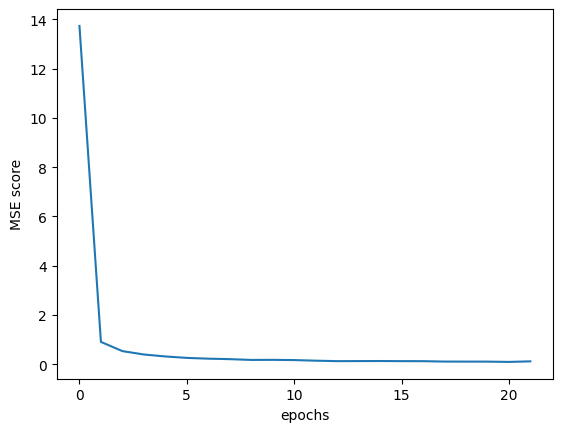

In [9]:
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.xlabel("epochs")
plt.ylabel("MSE score")
plt.show()

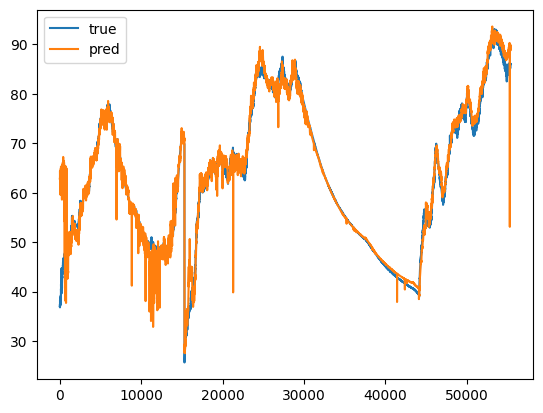

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)), y_test, label="true")
plt.plot(y_pred, label="pred")
plt.legend()
plt.show()